In [1]:
import pandas as pd
import matplotlib.pyplot as plt

population_data = pd.read_csv("population_state.csv")
population_data.head()

,state,date,sex,age,ethnicity,population
0,Johor,1970-01-01,both,overall,overall,1325.6
1,Johor,1970-01-01,both,0-4,overall,210.1
2,Johor,1970-01-01,both,5-9,overall,215.7
3,Johor,1970-01-01,both,10-14,overall,192.2
4,Johor,1970-01-01,both,15-19,overall,152.8


In [2]:
population_data["year"] = pd.to_datetime(population_data["date"]).dt.year
population_data.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
1,Johor,1970-01-01,both,0-4,overall,210.1,1970
2,Johor,1970-01-01,both,5-9,overall,215.7,1970
3,Johor,1970-01-01,both,10-14,overall,192.2,1970
4,Johor,1970-01-01,both,15-19,overall,152.8,1970


In [3]:
population_data = population_data[(population_data["age"] == "overall") &
                                          (population_data["ethnicity"] == "overall")]
population_data.head()

,state,date,sex,age,ethnicity,population,year
0,Johor,1970-01-01,both,overall,overall,1325.6,1970
16,Johor,1970-01-01,female,overall,overall,656.8,1970
32,Johor,1970-01-01,male,overall,overall,668.7,1970
48,Johor,1971-01-01,both,overall,overall,1355.4,1971
64,Johor,1971-01-01,female,overall,overall,671.9,1971


In [4]:
population_data_male = population_data[(population_data["sex"] == "male")]
population_data_male.tail()

,state,date,sex,age,ethnicity,population,year
261950,W.P. Putrajaya,2021-01-01,male,overall,overall,56.7,2021
262349,W.P. Putrajaya,2022-01-01,male,overall,overall,57.6,2022
262748,W.P. Putrajaya,2023-01-01,male,overall,overall,58.6,2023
263147,W.P. Putrajaya,2024-01-01,male,overall,overall,59.4,2024
263546,W.P. Putrajaya,2025-01-01,male,overall,overall,59.5,2025


In [5]:
population_data_female = population_data[(population_data["sex"] == "female")]
population_data_female.tail()

,state,date,sex,age,ethnicity,population,year
261817,W.P. Putrajaya,2021-01-01,female,overall,overall,58.5,2021
262216,W.P. Putrajaya,2022-01-01,female,overall,overall,59.4,2022
262615,W.P. Putrajaya,2023-01-01,female,overall,overall,60.2,2023
263014,W.P. Putrajaya,2024-01-01,female,overall,overall,60.8,2024
263413,W.P. Putrajaya,2025-01-01,female,overall,overall,61.2,2025


In [6]:
grouped_male = population_data_male.fillna(0)
grouped_male_pt = grouped_male.pivot_table("population", index = "state",
                                         columns = ["year"], aggfunc="sum")
grouped_male_pt_tr = grouped_male_pt.T
grouped_male_pt_tr

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
1970,668.7,500.0,351.3,206.0,252.3,272.7,821.7,63.0,405.8,367.2,525.5,874.4,208.4,NaN,NaN,NaN
1971,683.5,506.2,359.2,208.5,256.1,285.5,830.0,64.0,412.7,383.1,539.6,911.5,213.5,NaN,NaN,NaN
1972,698.4,511.7,367.4,210.5,259.7,298.9,837.7,65.1,419.7,399.9,554.1,949.3,219.1,NaN,NaN,NaN
1973,712.7,516.3,376.3,212.5,262.9,312.1,844.5,66.1,426.1,417.4,569.1,987.1,224.9,NaN,NaN,NaN
1974,727.6,521.1,384.7,214.2,266.2,326.3,851.3,67.0,432.4,435.8,584.4,1024.9,230.5,NaN,NaN,NaN
1975,743.9,526.6,394.0,216.3,269.8,340.6,858.8,68.1,439.3,455.0,600.1,1063.7,236.9,NaN,NaN,NaN
1976,759.5,530.7,402.8,217.9,272.9,354.9,865.2,69.2,446.1,473.4,615.6,1103.2,243.0,NaN,NaN,NaN
1977,776.4,536.7,412.6,220.0,276.4,370.3,873.2,70.4,453.3,492.7,631.4,1144.9,250.1,NaN,NaN,NaN
1978,792.2,540.9,421.4,221.7,279.8,385.3,879.8,71.5,459.6,512.8,647.7,1186.7,256.4,NaN,NaN,NaN


In [7]:
grouped_female = population_data_female.fillna(0)
grouped_female_pt = grouped_female.pivot_table("population", index = "state",
                                         columns = ["year"], aggfunc="sum")
grouped_female_pt_tr = grouped_female_pt.T
grouped_female_pt_tr

state,Johor,Kedah,Kelantan,Melaka,Negeri Sembilan,Pahang,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
year,,,,,,,,,,,,,,,,
1970,656.8,489.5,356.0,213.4,248.1,251.1,809.7,62.5,402.8,330.9,511.5,822.0,210.4,NaN,NaN,NaN
1971,671.9,497.7,364.5,216.4,252.1,262.9,820.9,63.5,411.0,345.0,525.6,859.4,215.4,NaN,NaN,NaN
1972,686.9,505.5,373.7,219.3,256.2,275.1,831.7,64.6,419.2,359.7,540.1,897.3,220.5,NaN,NaN,NaN
1973,701.8,512.7,383.1,221.7,260.0,287.2,841.5,65.7,426.8,375.1,555.0,935.3,226.1,NaN,NaN,NaN
1974,716.8,519.9,392.1,224.0,263.8,299.7,851.4,66.8,434.3,391.1,570.4,973.1,231.6,NaN,NaN,NaN
1975,733.1,528.3,402.1,226.8,267.8,312.8,862.1,68.1,442.3,408.0,586.1,1011.6,238.0,NaN,NaN,NaN
1976,748.9,534.7,411.3,229.4,271.4,325.5,871.5,69.2,450.3,424.7,601.9,1051.1,243.9,NaN,NaN,NaN
1977,765.5,543.1,421.5,232.1,275.4,339.3,882.4,70.6,458.8,442.2,618.1,1092.8,250.8,NaN,NaN,NaN
1978,781.2,550.0,431.1,234.5,278.9,352.9,891.7,71.7,466.1,460.4,634.8,1134.2,257.0,NaN,NaN,NaN


Sum each row of pivot tables to obtain population of male and female 

In [8]:
grouped_male_pt_tr['Total'] = grouped_male_pt_tr.sum(axis = 1)
grouped_male_pt_tr['Total']

year
1970     5517.0
1971     5653.4
1972     5791.5
1973     5928.0
1974     6066.4
1975     6213.1
1976     6354.4
1977     6508.4
1978     6655.8
1979     6812.6
1980     6991.8
1981     7188.5
1982     7394.1
1983     7600.6
1984     7810.2
1985     8033.2
1986     8264.0
1987     8494.6
1988     8725.9
1989     8956.4
1990     9185.3
1991     9416.4
1992     9687.0
1993     9963.6
1994    10243.1
1995    10521.5
1996    10800.3
1997    11081.9
1998    11372.2
1999    11666.5
2000    11965.6
2001    12257.5
2002    12536.9
2003    12808.2
2004    13078.8
2005    13353.2
2006    13627.6
2007    13903.4
2008    14179.2
2009    14457.0
2010    14730.6
2011    14979.9
2012    15215.2
2013    15604.8
2014    15867.9
2015    16112.0
2016    16346.3
2017    16542.7
2018    16721.5
2019    16765.0
2020    16966.4
2021    17000.4
2022    17039.8
2023    17472.4
2024    17879.1
2025    17957.7
Name: Total, dtype: float64

In [9]:
grouped_female_pt_tr['Total'] = grouped_female_pt_tr.sum(axis = 1)
grouped_female_pt_tr['Total']

year
1970     5364.7
1971     5506.3
1972     5649.8
1973     5792.0
1974     5935.0
1975     6087.1
1976     6233.8
1977     6392.6
1978     6544.5
1979     6705.9
1980     6887.1
1981     7068.2
1982     7257.0
1983     7447.5
1984     7640.0
1985     7849.6
1986     8065.2
1987     8279.0
1988     8493.1
1989     8705.6
1990     8917.2
1991     9130.5
1992     9380.8
1993     9638.0
1994     9898.7
1995    10160.4
1996    10422.5
1997    10687.3
1998    10961.4
1999    11243.0
2000    11529.3
2001    11773.2
2002    12005.4
2003    12229.8
2004    12462.8
2005    12692.3
2006    12922.5
2007    13154.6
2008    13388.6
2009    13624.5
2010    13858.1
2011    14082.0
2012    14294.9
2013    14608.8
2014    14840.9
2015    15074.1
2016    15287.3
2017    15479.8
2018    15660.8
2019    15758.1
2020    15481.1
2021    15575.6
2022    15658.1
2023    15929.8
2024    16173.0
2025    16274.0
Name: Total, dtype: float64

Merge Data for Male and Female using Common Key "year"

In [10]:
gender_df = pd.merge(grouped_male_pt_tr['Total'], grouped_female_pt_tr['Total'], 
                     on="year")
gender_df

,Total_x,Total_y
year,,
1970,5517.0,5364.7
1971,5653.4,5506.3
1972,5791.5,5649.8
1973,5928.0,5792.0
1974,6066.4,5935.0
1975,6213.1,6087.1
1976,6354.4,6233.8
1977,6508.4,6392.6
1978,6655.8,6544.5


In [11]:
gender_df = gender_df.reset_index()
gender_df

,year,Total_x,Total_y
0,1970,5517.0,5364.7
1,1971,5653.4,5506.3
2,1972,5791.5,5649.8
3,1973,5928.0,5792.0
4,1974,6066.4,5935.0
5,1975,6213.1,6087.1
6,1976,6354.4,6233.8
7,1977,6508.4,6392.6
8,1978,6655.8,6544.5
9,1979,6812.6,6705.9


Text(0.5, 0, 'Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.')

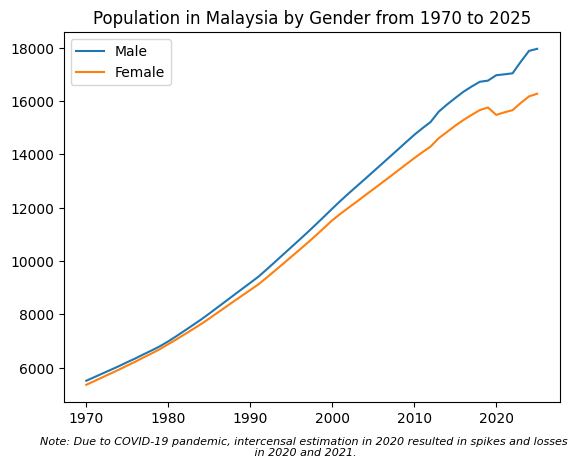

In [12]:
fig, ax = plt.subplots()

ax.plot(gender_df["year"], gender_df["Total_x"], label = "Male")
ax.plot(gender_df["year"], gender_df["Total_y"], label = "Female")
plt.title("Population in Malaysia by Gender from 1970 to 2025")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Proportion of Male and Female in Malaysia

In [13]:
gender_df["Male_percent"] = gender_df["Total_x"] / (gender_df["Total_x"] + gender_df["Total_y"])
gender_df["Female_percent"] = gender_df["Total_y"] / (gender_df["Total_x"] + gender_df["Total_y"])
gender_df

,year,Total_x,Total_y,Male_percent,Female_percent
0,1970,5517.0,5364.7,0.506998,0.493002
1,1971,5653.4,5506.3,0.506591,0.493409
2,1972,5791.5,5649.8,0.506192,0.493808
3,1973,5928.0,5792.0,0.505802,0.494198
4,1974,6066.4,5935.0,0.505474,0.494526
5,1975,6213.1,6087.1,0.505122,0.494878
6,1976,6354.4,6233.8,0.504790,0.495210
7,1977,6508.4,6392.6,0.504488,0.495512
8,1978,6655.8,6544.5,0.504216,0.495784
9,1979,6812.6,6705.9,0.503946,0.496054


In Malaysia, male continues to outnumber female

Text(0.5, 0, 'Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.')

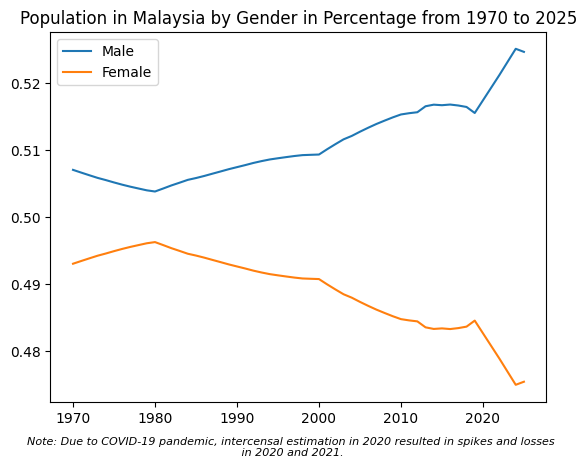

In [29]:
fig, ax = plt.subplots()
gender_df = gender_df.drop(index = [50, 51], errors= 'ignore')

ax.plot(gender_df["year"], gender_df["Male_percent"], label = "Male")
ax.plot(gender_df["year"], gender_df["Female_percent"], label = "Female")
plt.title("Population in Malaysia by Gender in Percentage from 1970 to 2025")
ax.legend()
plt.figtext(
    0.5, 0, 
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.",
    wrap=True, ha='center', fontsize=8, style='italic'
)

Human sex ratio in Malaysia exceeds one due to male outnumbering Female

In [26]:
gender_df["ratio"] = gender_df["Total_x"] / gender_df["Total_y"]
gender_df

,year,Total_x,Total_y,Male_percent,Female_percent,ratio
0,1970,5517.0,5364.7,0.506998,0.493002,1.028389
1,1971,5653.4,5506.3,0.506591,0.493409,1.026715
2,1972,5791.5,5649.8,0.506192,0.493808,1.025081
3,1973,5928.0,5792.0,0.505802,0.494198,1.023481
4,1974,6066.4,5935.0,0.505474,0.494526,1.022140
5,1975,6213.1,6087.1,0.505122,0.494878,1.020700
6,1976,6354.4,6233.8,0.504790,0.495210,1.019346
7,1977,6508.4,6392.6,0.504488,0.495512,1.018115
8,1978,6655.8,6544.5,0.504216,0.495784,1.017007
9,1979,6812.6,6705.9,0.503946,0.496054,1.015911


Text(0.5, 0, 'Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.')

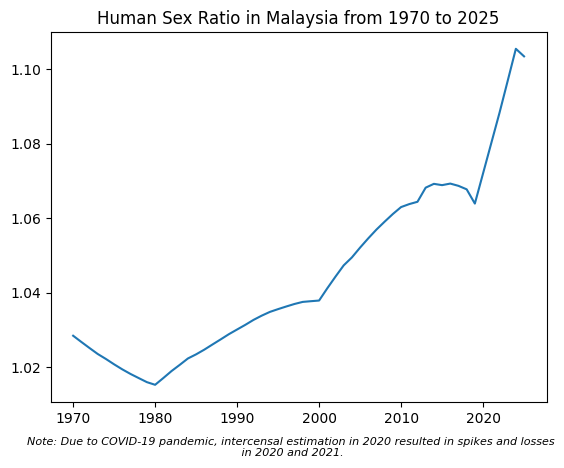

In [30]:
fig, ax = plt.subplots()

gender_df = gender_df.drop(index = [50, 51], errors= 'ignore')

ax.plot(gender_df["year"], gender_df["ratio"])
plt.title("Human Sex Ratio in Malaysia from 1970 to 2025")

plt.figtext(
    0.5, 0, 
    "Note: Due to COVID-19 pandemic, intercensal estimation in 2020 resulted in spikes and losses\n in 2020 and 2021.",
    wrap=True, ha='center', fontsize=8, style='italic'
)